In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools 
import os
import shutil
import random 
import glob
import matplotlib.pyplot as pyplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [12]:
os.chdir('/Users/RogerVazquezT/Documents/WorkSpace/sistintel/CV/dogs-vs-cats/train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c, 'test/dog')
os.chdir('../../')

In [19]:
train_path = '/Users/RogerVazquezT/Documents/WorkSpace/sistintel/CV/dogs-vs-cats/train/train'
test_path = '/Users/RogerVazquezT/Documents/WorkSpace/sistintel/CV/dogs-vs-cats/train/test'
valid_path = '/Users/RogerVazquezT/Documents/WorkSpace/sistintel/CV/dogs-vs-cats/train/valid'

In [20]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

Found 1000 images belonging to 2 classes.


In [21]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

Found 100 images belonging to 2 classes.


In [22]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)

Found 200 images belonging to 2 classes.


In [23]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [24]:
img, labels = next(train_batches)

In [28]:
def plotImg(img_arr):
    fig, axes = pyplot.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    pyplot.tight_layout()
    pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

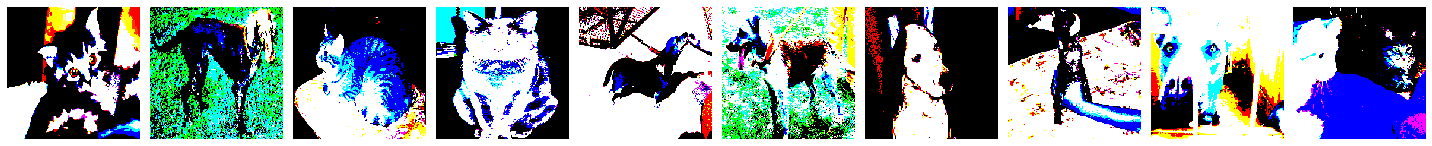

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [29]:
plotImg(img)
print(labels)

In [30]:
l1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3))
l2 = MaxPool2D(pool_size=(2,2), strides=2)
l3 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')
l4 = MaxPool2D(pool_size=(2,2), strides=2)
l5 = Flatten()
l6 = Dense(units=2, activation='softmax')

In [31]:
model = Sequential([l1,l2,l3,l4,l5,l6])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
model.fit(x=train_batches, validation_data = valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 33s - loss: 17.3568 - accuracy: 0.5380 - val_loss: 8.3767 - val_accuracy: 0.5750
Epoch 2/10
100/100 - 30s - loss: 2.8444 - accuracy: 0.7620 - val_loss: 3.7284 - val_accuracy: 0.6750
Epoch 3/10
100/100 - 31s - loss: 0.6369 - accuracy: 0.9070 - val_loss: 3.1318 - val_accuracy: 0.6500
Epoch 4/10
100/100 - 32s - loss: 0.1792 - accuracy: 0.9530 - val_loss: 3.0974 - val_accuracy: 0.6700
Epoch 5/10
100/100 - 32s - loss: 0.0921 - accuracy: 0.9690 - val_loss: 3.5473 - val_accuracy: 0.6400
Epoch 6/10
100/100 - 33s - loss: 0.0526 - accuracy: 0.9880 - val_loss: 4.0866 - val_accuracy: 0.6100
Epoch 7/10
100/100 - 33s - loss: 0.0484 - accuracy: 0.9840 - val_loss: 6.3100 - val_accuracy: 0.5650
Epoch 8/10
100/100 - 31s - loss: 0.0898 - accuracy: 0.9700 - val_loss: 3.2720 - val_accuracy: 0.6350
Epoch 9/10
100/100 - 32s - loss: 0.0307 - accuracy: 0.9890 - val_loss: 3.9586 - val_accuracy: 0.6250
Epoch 10/10
100/100 - 32s - loss: 0.0071 - accuracy: 0.9970 - val_loss: 3.1496 - val_accur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

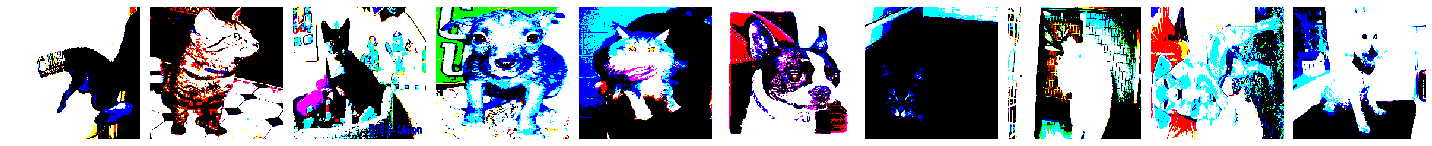

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [36]:
test_imgs, test_labels = next(test_batches)
plotImg(test_imgs)
print(test_labels)

In [37]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
preds = model.predict(x=test_batches, verbose = 0)

In [39]:
np.round(preds)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [41]:
conf_mat = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(preds, axis = -1))

In [62]:
def plot_conf_mat(cm, classes, normalize=False, title='Matriz de confusión', cmap = pyplot.cm.Blues):
    pyplot.imshow(cm, interpolation='nearest', cmap = cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else: 
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i, cm[i,j], horizontalalignment='center', color='white' if cm [i,j]>thresh else 'black')
    #plt.tight_layout()
   
    pyplot.ylabel('True lbl')
    pyplot.xlabel('Pred lbl')

In [63]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [64]:
cm_plot_labl = ['cat', 'dog']

Confusion matrix, without normalization
[[24 26]
 [25 25]]


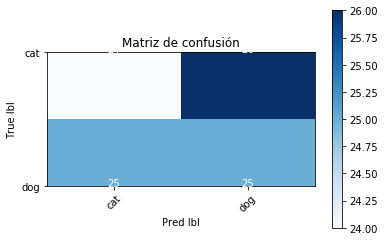

In [65]:
plot_conf_mat(conf_mat, cm_plot_labl)

## vgg16 model

In [96]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [97]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [98]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params':trainable_params}

In [99]:
params = count_params(vgg16_model)

In [100]:
assert params['non_trainable_params'] == 0

In [101]:
assert params['trainable_params'] == 138357544

In [102]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)

In [103]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [104]:
params = count_params(model2)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [105]:
for layer in model.layers:
    layer.trainable = False

In [106]:
model2.add(Dense(units=2, activation='softmax'))

In [107]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [114]:
model2.fit(x=train_batches, validation_data = valid_batches, epochs = 5, verbose = 2)

Epoch 1/5


KeyboardInterrupt: 

A partir de este punto no pude seguir ejecutando las celdas del tutorial. 
 Sería sensato hacerlo a través de un Google Collab pero creo que el tamaño del dataset excede el espacio disponible. 